In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

## mnistのdataをダウンロードする

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## dataの一部を見てみる

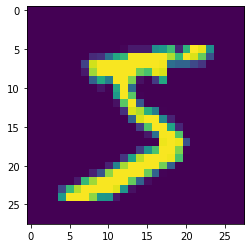

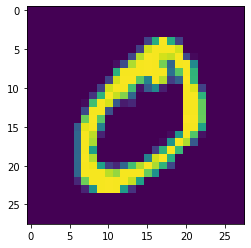

In [3]:
f1 = plt.figure(1)
plt.imshow(X_train[0])
f2 = plt.figure(2)
plt.imshow(X_train[1])
plt.show()

## 訓練用datasetをreshapeする

In [4]:
print(X_train[0].shape, len(X_train))
print(X_test[0].shape, len(X_test))

(28, 28) 60000
(28, 28) 10000


In [5]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

## target変数をOne-hot Encodeする

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Modelを作る

In [7]:
model = Sequential()

2021-07-26 23:28:16.462169: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Modelにlayerを追加する

In [8]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

## Modelの設定を行う
- optimizer: 最適化アルゴリズムにはadam algorithmを用いる
- loss: 損失関数には交差エントロピー誤差を用いる
- metrics: 評価関数にはaccuracyを用いる

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 学習

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

2021-07-26 23:28:17.108775: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
1875/1875 [==============================] - 80s 42ms/step - loss: 0.1976 - accuracy: 0.9536 - val_loss: 0.1178 - val_accuracy: 0.9666
Epoch 2/3
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0722 - val_accuracy: 0.9772
Epoch 3/3
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0457 - accuracy: 0.9853 - val_loss: 0.0950 - val_accuracy: 0.9744


## testデータを用いて推測する

In [11]:
model.predict(X_test[:6])

array([[5.1584188e-12, 7.2875793e-15, 1.0982925e-09, 2.3948570e-07,
        1.0630228e-12, 2.9686576e-11, 1.3659761e-17, 9.9999976e-01,
        8.0254459e-10, 2.3344178e-08],
       [3.3311292e-06, 4.6960520e-07, 9.9997854e-01, 1.6194846e-05,
        9.6500370e-11, 5.5080211e-14, 1.4153451e-06, 6.8670797e-10,
        2.1754929e-08, 1.1515045e-14],
       [2.8777475e-07, 9.9977952e-01, 2.6307501e-07, 5.2306359e-10,
        3.7088981e-07, 5.3444278e-08, 2.4908033e-09, 3.9994470e-09,
        2.1949415e-04, 4.3753832e-09],
       [9.9999869e-01, 1.7278857e-11, 4.3621668e-07, 1.7335636e-11,
        9.0422824e-13, 5.2723707e-11, 3.5789540e-08, 5.0181066e-12,
        7.1625962e-08, 7.6961106e-07],
       [7.3284084e-10, 1.3045612e-11, 3.5857545e-12, 8.8273477e-10,
        9.9999940e-01, 2.3121231e-12, 4.7235909e-16, 8.0220943e-13,
        8.4880436e-10, 6.0936708e-07],
       [6.4140664e-08, 9.9081272e-01, 1.9092354e-09, 7.3256838e-11,
        2.3840091e-08, 1.3365524e-09, 3.9020520e-13, 1.98

In [12]:
y_test[:6]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)